In [80]:
#.......................................................Foot_Training...............................................#

import os
import time
import joblib
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report 
warnings.filterwarnings(action = 'ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("fsr_dataset.csv")
df[:] = np.nan_to_num(df)

In [3]:
df[:]

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,Target
0,229,169,928,823,289,moderate
1,686,200,689,547,713,moderate
2,60,891,123,6,962,moderate
3,21,30,943,47,505,moderate
4,524,22,628,672,380,moderate
...,...,...,...,...,...,...
99995,375,641,860,898,422,moderate
99996,338,622,188,704,552,moderate
99997,977,11,705,306,482,moderate
99998,971,22,911,181,364,moderate


In [4]:
df[:]['Target'].unique()

array(['moderate', 'severe', 'mild'], dtype=object)

In [5]:
df[:]['Target'].value_counts()

moderate    86395
severe       7952
mild         5653
Name: Target, dtype: int64

In [6]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,Target
0,229,169,928,823,289,moderate
1,686,200,689,547,713,moderate
2,60,891,123,6,962,moderate
3,21,30,943,47,505,moderate
4,524,22,628,672,380,moderate
...,...,...,...,...,...,...
99995,375,641,860,898,422,moderate
99996,338,622,188,704,552,moderate
99997,977,11,705,306,482,moderate
99998,971,22,911,181,364,moderate


In [7]:
df.shape

(100000, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   FSR_1   100000 non-null  int64 
 1   FSR_2   100000 non-null  int64 
 2   FSR_3   100000 non-null  int64 
 3   FSR_4   100000 non-null  int64 
 4   FSR_5   100000 non-null  int64 
 5   Target  100000 non-null  object
dtypes: int64(5), object(1)
memory usage: 4.6+ MB


In [9]:
df.describe()

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,512.638380,511.526420,510.634870,512.510160,512.47678
std,295.372975,296.629975,296.704211,295.113732,296.34883
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,258.000000,255.000000,253.000000,258.000000,256.00000
50%,513.000000,511.000000,511.000000,513.000000,512.00000
75%,768.000000,769.000000,769.000000,767.000000,769.00000
max,1024.000000,1024.000000,1024.000000,1024.000000,1024.00000


In [10]:
df.head(73590)

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,Target
0,229,169,928,823,289,moderate
1,686,200,689,547,713,moderate
2,60,891,123,6,962,moderate
3,21,30,943,47,505,moderate
4,524,22,628,672,380,moderate
...,...,...,...,...,...,...
73585,473,393,845,533,180,moderate
73586,951,689,281,88,284,moderate
73587,504,119,952,212,59,moderate
73588,669,395,68,821,215,moderate


In [11]:
df1=df

In [12]:
df1['Target'].unique()

array(['moderate', 'severe', 'mild'], dtype=object)

In [14]:
filter = df1["Target"]=='moderate'

In [15]:
df1.where(filter)

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,Target
0,229.0,169.0,928.0,823.0,289.0,moderate
1,686.0,200.0,689.0,547.0,713.0,moderate
2,60.0,891.0,123.0,6.0,962.0,moderate
3,21.0,30.0,943.0,47.0,505.0,moderate
4,524.0,22.0,628.0,672.0,380.0,moderate
...,...,...,...,...,...,...
99995,375.0,641.0,860.0,898.0,422.0,moderate
99996,338.0,622.0,188.0,704.0,552.0,moderate
99997,977.0,11.0,705.0,306.0,482.0,moderate
99998,971.0,22.0,911.0,181.0,364.0,moderate


In [16]:
df1['Target'].value_counts()

moderate    86395
severe       7952
mild         5653
Name: Target, dtype: int64

In [33]:
df1['Target'].replace({'moderate':0,'mild':1,'severe':2},inplace=True)

In [34]:
df1

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,Target
0,229,169,928,823,289,0
1,686,200,689,547,713,0
2,60,891,123,6,962,0
3,21,30,943,47,505,0
4,524,22,628,672,380,0
...,...,...,...,...,...,...
99995,375,641,860,898,422,0
99996,338,622,188,704,552,0
99997,977,11,705,306,482,0
99998,971,22,911,181,364,0


In [35]:
y = df['Target'].values
X = df.drop('Target', axis=1).values

In [36]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
X_train

array([[246, 581, 815, 123, 997],
       [ 63, 932, 901, 510, 563],
       [274,  95, 827, 808, 239],
       ...,
       [ 94, 515, 491, 546, 545],
       [900, 341, 853, 803, 563],
       [148, 573, 230, 211,  80]], dtype=int64)

In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [39]:
y_train_res

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [40]:
from collections import Counter
counts = Counter(y_train_res)

# Print value counts
print(counts)

Counter({0: 60509, 1: 60509, 2: 60509})


In [41]:
knn = KNeighborsClassifier(n_neighbors=6)

In [42]:
knn.fit(X_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=6)

In [43]:
y_pred = knn.predict(X_test)
print("Prediction : {}".format(y_pred))

Prediction : [1 2 0 ... 0 1 0]


In [44]:
print("Foot Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Foot Accuracy: 96.58666666666666


In [45]:
joblib.dump(knn,'foot_model.pkl')

['foot_model.pkl']

In [46]:
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Report :')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[24928   410   548]
 [   28  1672     0]
 [   38     0  2376]]
Accuracy Score : 0.9658666666666667
Report :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     25886
           1       0.80      0.98      0.88      1700
           2       0.81      0.98      0.89      2414

    accuracy                           0.97     30000
   macro avg       0.87      0.98      0.92     30000
weighted avg       0.97      0.97      0.97     30000



In [47]:
#creating XGBoost model
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train_res,y_train_res)
y_pred = XGB.predict(X_test)

In [48]:
# calculating RMSE 
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [49]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [50]:
#Root mean square error(RMSE)
print("RMSE:",rmse)

RMSE: 0.3924737721196907


In [51]:
XGB_Score=XGB.score(X_test,y_test)

In [52]:
XGB_Score

0.5348934119784275

In [53]:
#linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_res,y_train_res)
y_pred = regressor.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",rmse)

RMSE: 0.9685216930936278


In [55]:
LR_Score=regressor.score(X_test,y_test)

In [56]:
LR_Score

-1.8323695542979852

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=6)

In [60]:
knn.fit(X_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=6)

In [61]:
y_pred=knn.predict(X_test)

In [62]:
y_pred

array([1, 2, 0, ..., 0, 1, 0], dtype=int64)

In [63]:
yl=[]
for i in y_test:
    yl.append(i)

In [64]:
c=0
for i in range(len(yl)):
    print(yl[i],y_pred[i])
    if yl[i]==y_pred[i]:
        c=c+1
    

1 1
2 2
0 0
0 0
0 0
2 2
0 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
2 2
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
0 0
0 0
0 2
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
2 2
0 0
0 0
2 2
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
2 2
0 0
0 2
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
1 1
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
2 2
0 0
2 2
0 0
1 1
0 0
0 0
0 0


0 0
0 0
0 0
0 0
2 2
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
1 1
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
2 2
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
2 2
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 2
0 0
0 0
0 1
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 2
0 0
0 0
0 2
0 2
2 2
0 0
1 1
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 1
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
1 1
0 0
0 0
0 0
2 2
0 0
2 2
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
2 2
0 0
0 0
0 0
0 0
1 1
0 0
2 2
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
2 2
0 0
1 1
0 0
0 0
0 2
1 1
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
2 2
0 2
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
2 2
0 2
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
2 2
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
2 2
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
2 0
2 2
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 2
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
1 1
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
2 2
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
1 1
0 0
2 2
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
1 1
0 0
2 2
2 2
0 1
0 0
0 2
0 0
2 2
0 0
0 0
0 0
2 2
0 0
2 2
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
2 2
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
2 2
2 2
1 1
0 0
0 0
2 2
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0


0 0
2 2
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
2 2
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
1 1
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
2 2
1 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
2 2
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 2
0 2
0 1
0 0
0 0
2 2
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 1
0 0
0 0
1 1
0 0
1 1
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
1 1
0 0
0 0
2 2
2 2
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
1 1
0 0
0 0
2 2
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
2 2
0 0
0 2
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
2 2
2 2
0 0
0 0
2 2
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 1
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
2 2
1 1
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
2 2
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1


0 0
2 2
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
2 2
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
1 1
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
2 2
1 1
0 0
0 0
0 0
0 1
0 0
0 0
2 2
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 1
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
1 1
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 2
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 0
0 0
0 0
2 2


0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 2
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
1 1
2 2
0 0
0 0
2 2
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
0 0
0 0
0 0
0 0
0 0
1 1
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
1 1
0 0
2 2
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
1 1
2 2
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
1 1
1 1
2 2
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
2 2
1 1


0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 2
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
2 2
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
2 2
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
2 2
0 0
0 0
0 0
2 2
2 2
0 1
0 0
2 2
0 0
0 0
2 2
2 2
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
0 0
0 0
0 0
0 0
2 2
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
1 1
0 0
2 2
0 0
1 1
0 0
0 0
0 0
0 0
2 2
0 0
1 1
2 2
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
1 1
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
2 2
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
1 1
0 0
2 2
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
2 2
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 2
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
2 2
0 0
0 0
0 0
0 0
1 1


2 2
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
2 2
2 2
1 1
0 0
2 2
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 2
1 1
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
2 2
1 1
0 0
2 2
0 2
0 0
0 0
1 1
0 0
0 0
2 2
0 2
0 0
0 0
0 0
1 1
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
2 2
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 2
0 0
0 0
0 0
0 0
0 2
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
2 2
2 2
0 0
0 0
0 0
0 0
2 2
0 0
1 1
1 1
0 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
2 2
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
2 2
1 1
0 0
0 0
0 0
2 2
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
2 2
0 0
2 2
0 0
2 2
0 0
0 0
0 0
0 0
2 2
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
2 2
0 0
0 1
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
2 2
0 0
0 0
1 1
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
2 2
2 2
1 1
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
1 1
2 2
0 0
0 0
0 0
2 2
0 2
1 1
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
2 2
2 2
2 2
2 2
0 0
0 0


In [65]:
KNN_Score=c/len(y_pred)%100

In [66]:
KNN_Score

0.9658666666666667

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(confusion_matrix(y_test,y_pred))

[[24928   410   548]
 [   28  1672     0]
 [   38     0  2376]]


In [69]:
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     25886
           1       0.80      0.98      0.88      1700
           2       0.81      0.98      0.89      2414

    accuracy                           0.97     30000
   macro avg       0.87      0.98      0.92     30000
weighted avg       0.97      0.97      0.97     30000



0.9575666666666667
train score - 1.0
test score - 0.9575666666666667


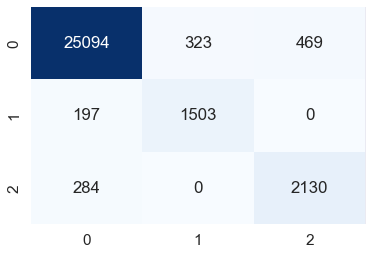

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     25886
           1       0.82      0.88      0.85      1700
           2       0.82      0.88      0.85      2414

    accuracy                           0.96     30000
   macro avg       0.87      0.91      0.89     30000
weighted avg       0.96      0.96      0.96     30000



In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train_res,y_train_res)
y_pred_dtc = dtc.predict(X_test)
dtc_score = accuracy_score(y_pred_dtc,y_test)
print(dtc_score)
print("train score - " + str(dtc.score(X_train, y_train)))
print("test score - " + str(dtc.score(X_test, y_test)))
cm_dtc = confusion_matrix(y_test,y_pred_dtc)

sns.set(font_scale=1.4) # for label size
#sns.heatmap(cm_dtc, annot=True, annot_kws={"size": 16}) # font size
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()
print(classification_report(y_test, y_pred_dtc))

0.9721
train score - 0.9995428571428572
test score - 0.9721


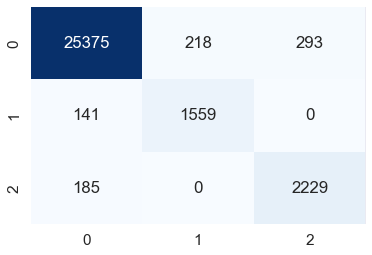

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     25886
           1       0.88      0.92      0.90      1700
           2       0.88      0.92      0.90      2414

    accuracy                           0.97     30000
   macro avg       0.92      0.94      0.93     30000
weighted avg       0.97      0.97      0.97     30000



In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10 , criterion='entropy',random_state=0)
rfc.fit(X_train_res,y_train_res)
y_pred_rfc = rfc.predict(X_test) 
rfc_score = accuracy_score(y_pred_rfc,y_test)
print(rfc_score)
print("train score - " + str(rfc.score(X_train, y_train)))
print("test score - " + str(rfc.score(X_test, y_test)))

cm = confusion_matrix(y_test,y_pred_rfc)

sns.set(font_scale=1.4) # for label size
#sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()
print(classification_report(y_test, y_pred_rfc))

0.8598
train score - 0.8599571428571429
test score - 0.8598


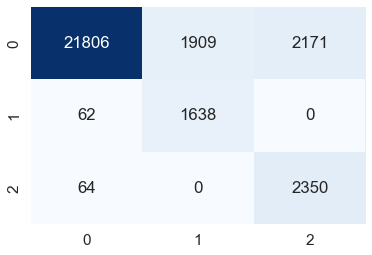

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     25886
           1       0.46      0.96      0.62      1700
           2       0.52      0.97      0.68      2414

    accuracy                           0.86     30000
   macro avg       0.66      0.93      0.74     30000
weighted avg       0.93      0.86      0.88     30000



In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_res,y_train_res)
y_pred_gnb = gnb.predict(X_test) 
gnb_score = accuracy_score(y_pred_gnb,y_test)
print(gnb_score)
print("train score - " + str(gnb.score(X_train, y_train)))
print("test score - " + str(gnb.score(X_test, y_test)))
 
cm_gnb = confusion_matrix(y_test,y_pred_gnb)

sns.set(font_scale=1.4) # for label size
#sns.heatmap(cm_gnb, annot=True, annot_kws={"size": 16}) # font size
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()
print(classification_report(y_test, y_pred_gnb))

In [73]:
scores = [XGB_Score, LR_Score, KNN_Score,dtc_score,rfc_score,gnb_score]
print(scores)

[0.5348934119784275, -1.8323695542979852, 0.9658666666666667, 0.9575666666666667, 0.9721, 0.8598]


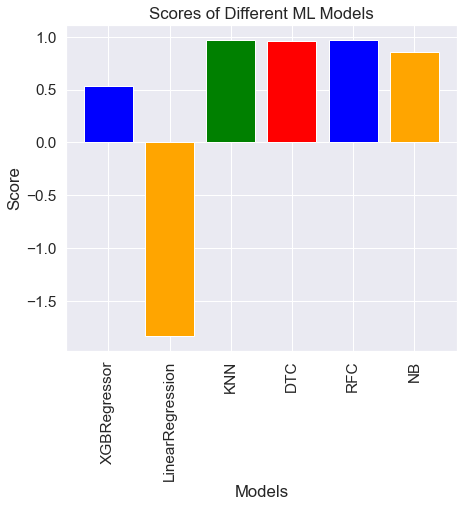

In [74]:
import matplotlib.pyplot as plt
models = ['XGBRegressor', 'LinearRegression', 'KNN','DTC','RFC','NB']
scores = [XGB_Score, LR_Score, KNN_Score,dtc_score,rfc_score,gnb_score]
plt.figure(figsize=(7, 6))
plt.bar(models, scores, color=['blue', 'orange', 'green', 'red'])
plt.title('Scores of Different ML Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=90)

plt.show()


In [75]:
import joblib
joblib.dump(rfc,'bestmodel.joblib')

['bestmodel.joblib']

In [76]:
loaded_best= joblib.load('bestmodel.joblib')

# Now, you can use loaded_svm to make predictions
predictions = loaded_best.predict(X_test)

In [77]:
predictions

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)